In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape) 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


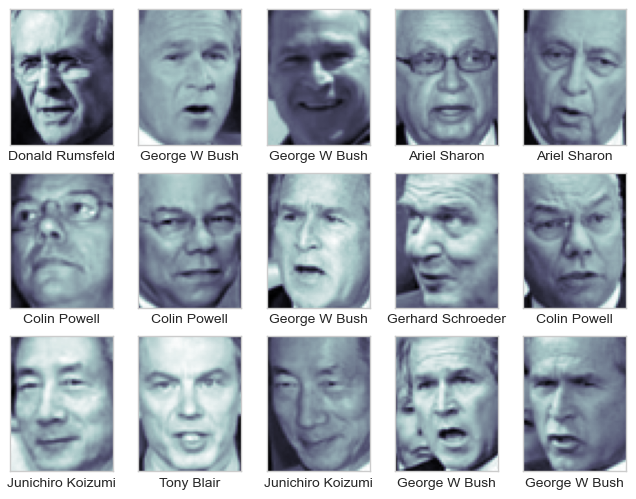

In [5]:
fig,ax = plt.subplots(3,5,figsize=(8,6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[], yticks=[],
        xlabel=faces.target_names[faces.target[i]])
    

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150,whiten=True,
         svd_solver='ramdomized',random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytttest = train_test_split(faces.data, faces.target, random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Define the model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define parameter grid
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# Initialize GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)

# Fit the model
%time grid.fit(Xtrain, ytrain)

# Get the best parameters
print(grid.best_params_)

CPU times: total: 35.3 s
Wall time: 59.5 s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [16]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

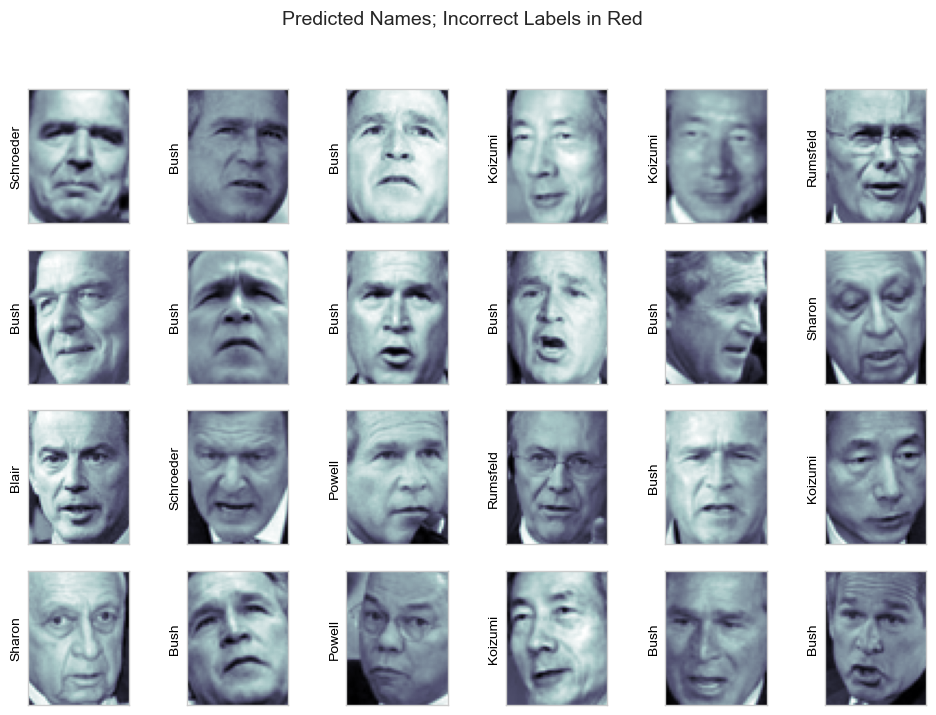

In [22]:
fig, ax = plt.subplots(4, 6, figsize=(12, 8))

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')  # Adjust to correct shape
    axi.set(xticks=[], yticks=[])

    # Ensure 'faces' and 'ytest' exist
    label = f"Person {yfit[i]}"  # Default label

    if 'faces' in dir() and hasattr(faces, 'target_names'):
        label = faces.target_names[yfit[i]].split()[-1]

    # Safe ytest check
    if 'ytest' in dir():
        color = 'black' if yfit[i] == ytest[i] else 'red'
    else:
        color = 'black'  # Default color when ytest is unavailable

    axi.set_ylabel(label, color=color)

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()
